In [1]:
### IMPORTS

%matplotlib inline
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

#set font size of plots to 22
matplotlib.rcParams.update({"font.size":22})

In [2]:
N = 101
hypothesis = range(0, N)
ABSTAIN = 0
TAPAT = 1
SANTUGON = 2
data0 = [ABSTAIN] * 118
data1 = [TAPAT] * 132
data2 = [SANTUGON] * 110
data = data0 + data1 + data2

biasTapat = 0
biasSantugon = 0
biasAbstain = 0

In [3]:
def computeForBias(data):
    numTapat = 1
    numSantugon = 1
    numAbstain = 1
    total = 3
    
    for d in data:
        if(d == TAPAT):
            numTapat = numTapat + 1
        elif(d == SANTUGON):
            numSantugon = numSantugon + 1
        else:
            numAbstain = numAbstain + 1
        
        total = total + 1
        biasTapat = numTapat / total
        biasSantugon = numSantugon / total
        biasAbstain = numAbstain / total
        
    print("biasTapat = ", biasTapat)
    print("biasSantugon = ", biasSantugon)
    print("biasAbstain = ", biasAbstain)
    
    return biasTapat, biasSantugon, biasAbstain
    

In [4]:
# Our priors will be uniformly distributed:
def initPriors(hypothesis):
    pH = []
    
    # get pH
    for h in hypothesis:
        pH.append(1/len(hypothesis))
    return pH     # set each prior to a uniform value

prior = initPriors(hypothesis)

np.mean(prior)

0.0099009900990098994

In [5]:
def likelihood(data, hypothesis):
#     print("biasTapat = ", biasTapat)
#     print("biasSantugon = ", biasSantugon)
#     print("biasAbstain = ", biasAbstain)
    
    pDH = []
    for h in hypothesis:
        if(data == TAPAT):
            pDH.append(h/100 * biasTapat)
        elif(data == SANTUGON):
            pDH.append((1 - h/100)*biasSantugon)
        else:
            pDH.append((1 - h/100)*biasAbstain)
    
    return pDH

In [6]:
def update(hypo, prior, data):
    # for each hypothesis, calculate P(H) * P(D|H), or the prior times the likelihood
    
    # get pHpDH
    pHpDH = []
    pDH = likelihood(data, hypo)
    pSum = 0
    for i in range(0,len(hypo)):
        pHpDH.append(prior[i] * pDH[i])
        pSum = pSum + pHpDH[i]
#     print(pSum)    
    posterior = []
    for i in range(0,len(hypo)):
        if(pSum == 0):
            posterior.append(0)
        else:
            posterior.append(pHpDH[i]/pSum)
        
    return posterior

biasTapat =  0.36639118457300274
biasSantugon =  0.30578512396694213
biasAbstain =  0.3278236914600551
TAPAT =  36.74033149171273


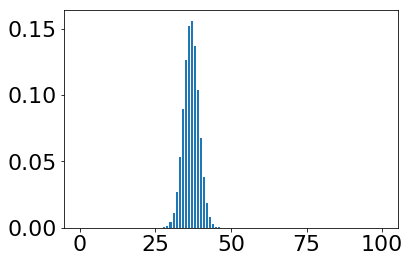

In [7]:
biasTapat, biasSantugon, biasAbstain = computeForBias(data)
    
for d in data:
    prior = update(hypothesis, prior, d)

# find the dataset mean
mean = 0
for i in range(0, len(prior)):
    mean = mean + hypothesis[i] * prior[i]
    
# plotting code
width = 1/1.5
plt.bar(hypothesis, prior, width)
# plt.bar(hypothesis, prior, alpha=0.85, color="#348ABD")
fig = plt.gcf()

# plotting code, decomment when you're done
print("TAPAT = ", mean)